In [243]:
!pip install pandas

In [244]:
pip install plotly geopandas

Note: you may need to restart the kernel to use updated packages.


In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
import plotly.express as px

import plotly.express as px
import json
from pandas.plotting import table



In [246]:
df = pd.read_excel('kenya_sgbv_dt_2020_2024.xlsx',skiprows=1)

In [247]:
df.head()

,County,"0-11Yrs, Male 2020","0-11Yrs, Female 2020",Total Male & Female 0-11Yrs 2020,"12-17Yrs, Male 2020","12-17Yrs, Female 2020","Total Male & Female 12-17Yrs, 2020","18-49Yrs, Male 2020","18-49Yrs, Female 2020","Total Male & Female 18-49Yrs, 2020",...,"12-17Yrs, Male 2023","12-17Yrs, Female 2023","Total Male & Female 12-17Yrs, 2023","18-49Yrs, Male 2023","18-49Yrs, Female 2023","Total Male & Female 18-49Yrs, 2023","50 Yrs and above, Male 2023","50 Yrs and above, Female 2023","Total Male & Female 50 Yrs and above, 2023",Total cases presented in 2023
0,Baringo,NaN,NaN,0,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,9.0,9.0,2.0,23.0,25.0,1.0,5.0,6.0,NaN
1,Bomet,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,...,5.0,59.0,64.0,9.0,39.0,48.0,NaN,2.0,2.0,NaN
2,Bungoma,2.0,69.0,71,7.0,396.0,403.0,17.0,97.0,114.0,...,16.0,332.0,348.0,22.0,196.0,218.0,10.0,12.0,22.0,NaN
3,Busia,1.0,29.0,30,7.0,130.0,137.0,5.0,39.0,44.0,...,6.0,145.0,151.0,32.0,152.0,184.0,6.0,37.0,43.0,NaN
4,Elgeyo Marakwet,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,11.0,11.0,6.0,18.0,24.0,1.0,3.0,4.0,NaN


In [248]:
df = df.fillna(0)

In [249]:
df.head()

,County,"0-11Yrs, Male 2020","0-11Yrs, Female 2020",Total Male & Female 0-11Yrs 2020,"12-17Yrs, Male 2020","12-17Yrs, Female 2020","Total Male & Female 12-17Yrs, 2020","18-49Yrs, Male 2020","18-49Yrs, Female 2020","Total Male & Female 18-49Yrs, 2020",...,"12-17Yrs, Male 2023","12-17Yrs, Female 2023","Total Male & Female 12-17Yrs, 2023","18-49Yrs, Male 2023","18-49Yrs, Female 2023","Total Male & Female 18-49Yrs, 2023","50 Yrs and above, Male 2023","50 Yrs and above, Female 2023","Total Male & Female 50 Yrs and above, 2023",Total cases presented in 2023
0,Baringo,0.0,0.0,0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,9.0,9.0,2.0,23.0,25.0,1.0,5.0,6.0,0.0
1,Bomet,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,59.0,64.0,9.0,39.0,48.0,0.0,2.0,2.0,0.0
2,Bungoma,2.0,69.0,71,7.0,396.0,403.0,17.0,97.0,114.0,...,16.0,332.0,348.0,22.0,196.0,218.0,10.0,12.0,22.0,0.0
3,Busia,1.0,29.0,30,7.0,130.0,137.0,5.0,39.0,44.0,...,6.0,145.0,151.0,32.0,152.0,184.0,6.0,37.0,43.0,0.0
4,Elgeyo Marakwet,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,11.0,6.0,18.0,24.0,1.0,3.0,4.0,0.0


In [250]:
# Drop the row where 'Country' is 'Kenya'
df_filtered = df[df['Country'] != 'Kenya']


KeyError: 'Country'

In [ ]:
# Define a function to sum columns by year, regardless of gender or age group
def sum_by_year(df, year):
    # Filter columns related to the specified year, ignoring age and gender
    columns = [col for col in df.columns if f'{year}' in col and 'Total Cases' not in col]
    
    # Calculate total cases by summing the specified columns
    df[f'Total Cases {year}'] = df[columns].sum(axis=1)

# Add total cases columns for each year
for year in ['2020', '2021', '2022', '2023']:
    sum_by_year(df, year)

# Keep only the 'County' column and the summed columns
columns_to_keep = ['County'] + [f'Total Cases {year}' for year in ['2020', '2021', '2022', '2023']]
df_filtered = df[columns_to_keep]

# Display the updated DataFrame
print(df_filtered)

In [ ]:
df_filtered.head()

In [ ]:
df_filtered = df_filtered.set_index('County')


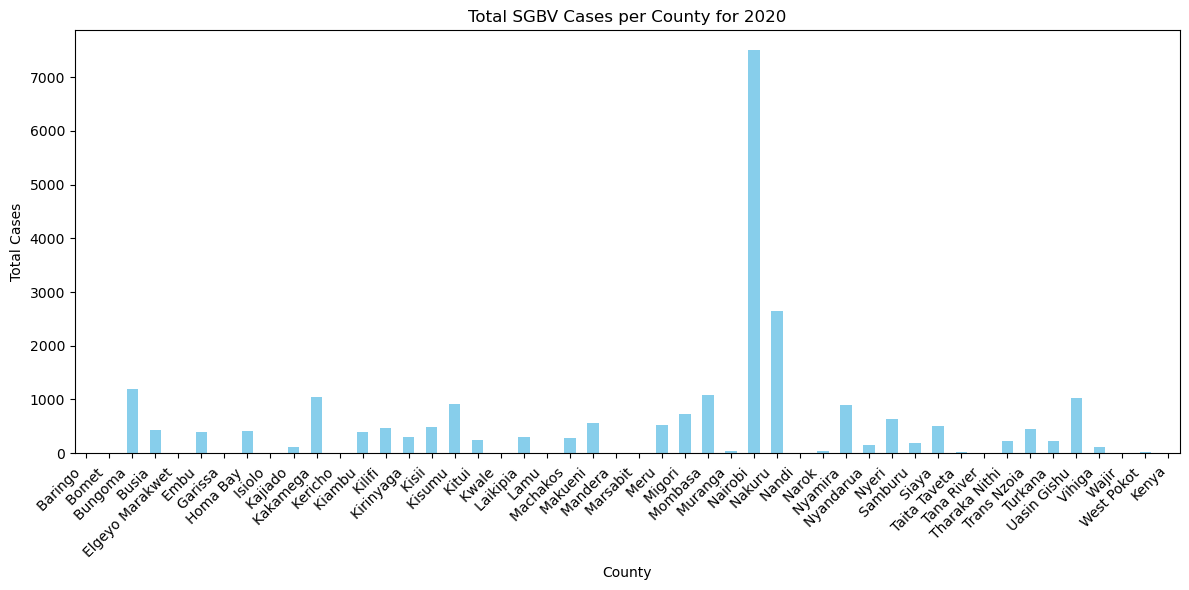

In [251]:
# Plotting the bar graph for Total Cases 2020
df_filtered['Total Cases 2020'].plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add titles and labels
plt.title('Total SGBV Cases per County for 2020')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as a PDF
plt.savefig('total_cases_per_county_2020.pdf', format='pdf')

# Display the plot
plt.show()

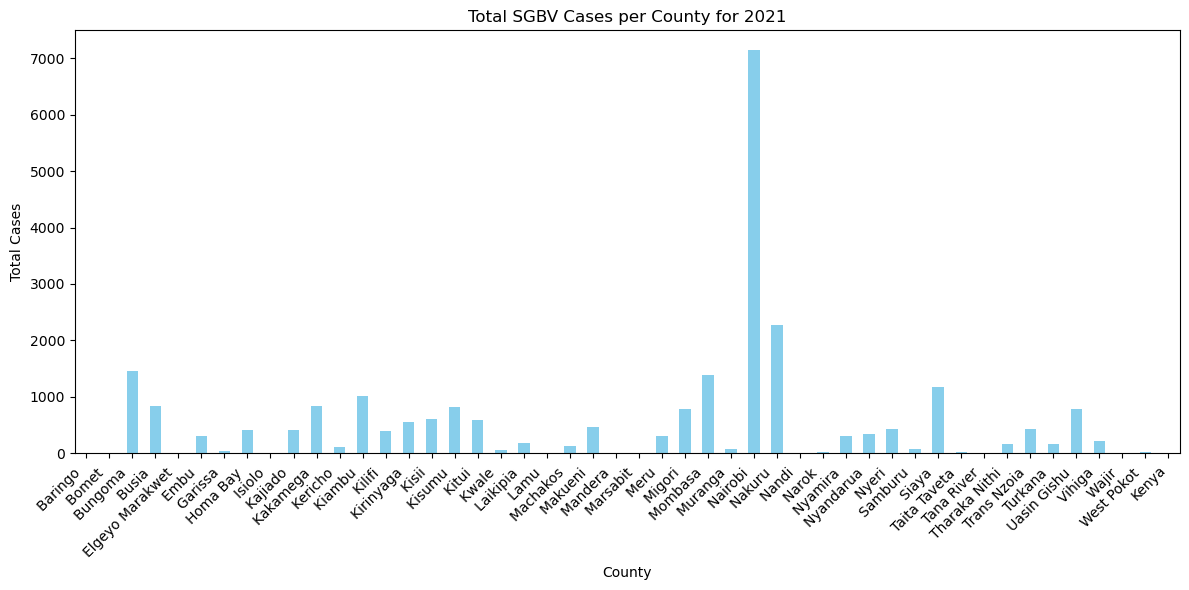

In [252]:
# Plotting the bar graph for Total Cases 2021
df_filtered['Total Cases 2021'].plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add titles and labels
plt.title('Total SGBV Cases per County for 2021')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()  # Adjust layout to fit labels



# Save the plot as a PDF
plt.savefig('total_cases_per_county_2021.pdf', format='pdf')

# Display the plot
plt.show()

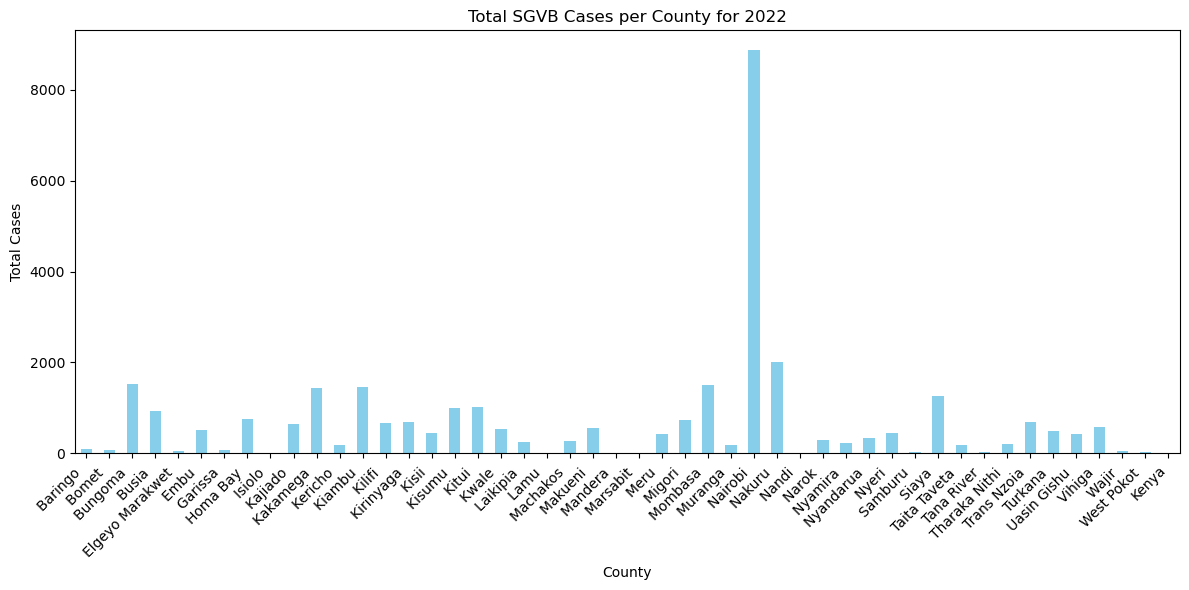

In [253]:
# Plotting the bar graph for Total Cases 2022
df_filtered['Total Cases 2022'].plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add titles and labels
plt.title('Total SGVB Cases per County for 2022')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()  # Adjust layout to fit labels
# Save the plot as a PDF
plt.savefig('total_cases_per_county_2022.pdf', format='pdf')

# Display the plot
plt.show()

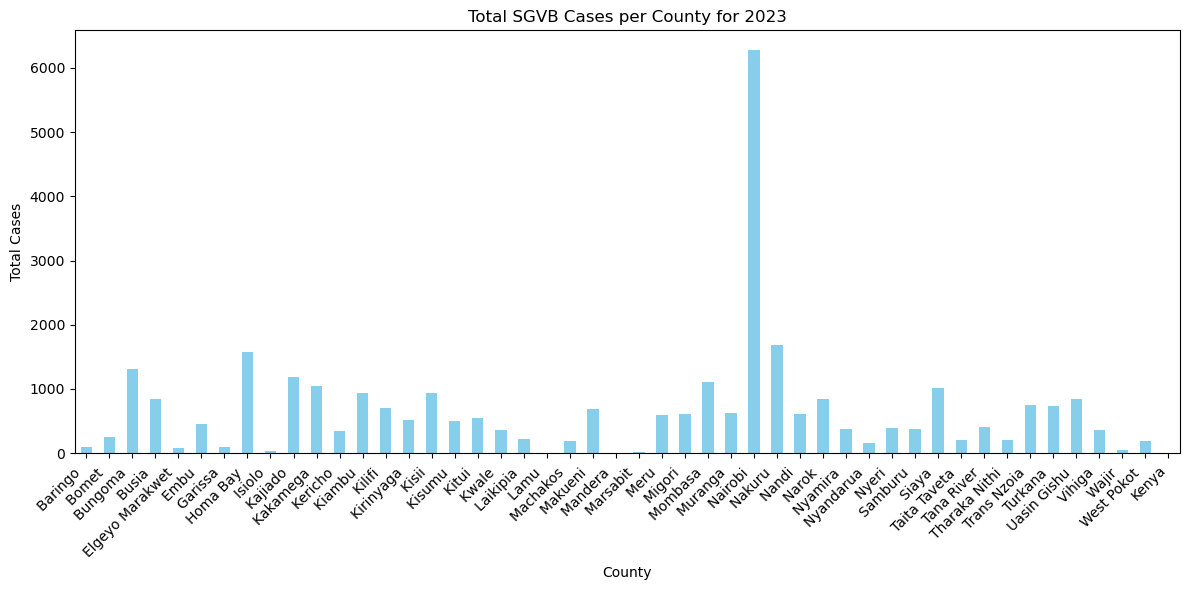

In [254]:
# Plotting the bar graph for Total Cases 2022
df_filtered['Total Cases 2023'].plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add titles and labels
plt.title('Total SGVB Cases per County for 2023')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
# Save the plot as a PDF
plt.savefig('total_cases_per_county_2023.pdf', format='pdf')
plt.show()

In [255]:
# Sort the DataFrame by 'Total Cases 2020', 'Total Cases 2021', 'Total Cases 2022', and 'Total Cases 2023' in ascending order
df_sorted = df_filtered.sort_values(by=['Total Cases 2020', 'Total Cases 2021', 'Total Cases 2022', 'Total Cases 2023'], ascending=False)

In [256]:
df_sorted

,Total Cases 2020,Total Cases 2021,Total Cases 2022,Total Cases 2023
County,,,,
Nairobi,7498.0,7140.0,8868.0,6272.0
Nakuru,2650.0,2276.0,1998.0,1678.0
Bungoma,1190.0,1452.0,1530.0,1318.0
Mombasa,1084.0,1388.0,1508.0,1104.0
Kakamega,1052.0,832.0,1442.0,1046.0
Uasin Gishu,1020.0,778.0,428.0,844.0
Kisumu,908.0,816.0,998.0,500.0
Nyamira,890.0,310.0,226.0,374.0
Migori,722.0,778.0,730.0,610.0


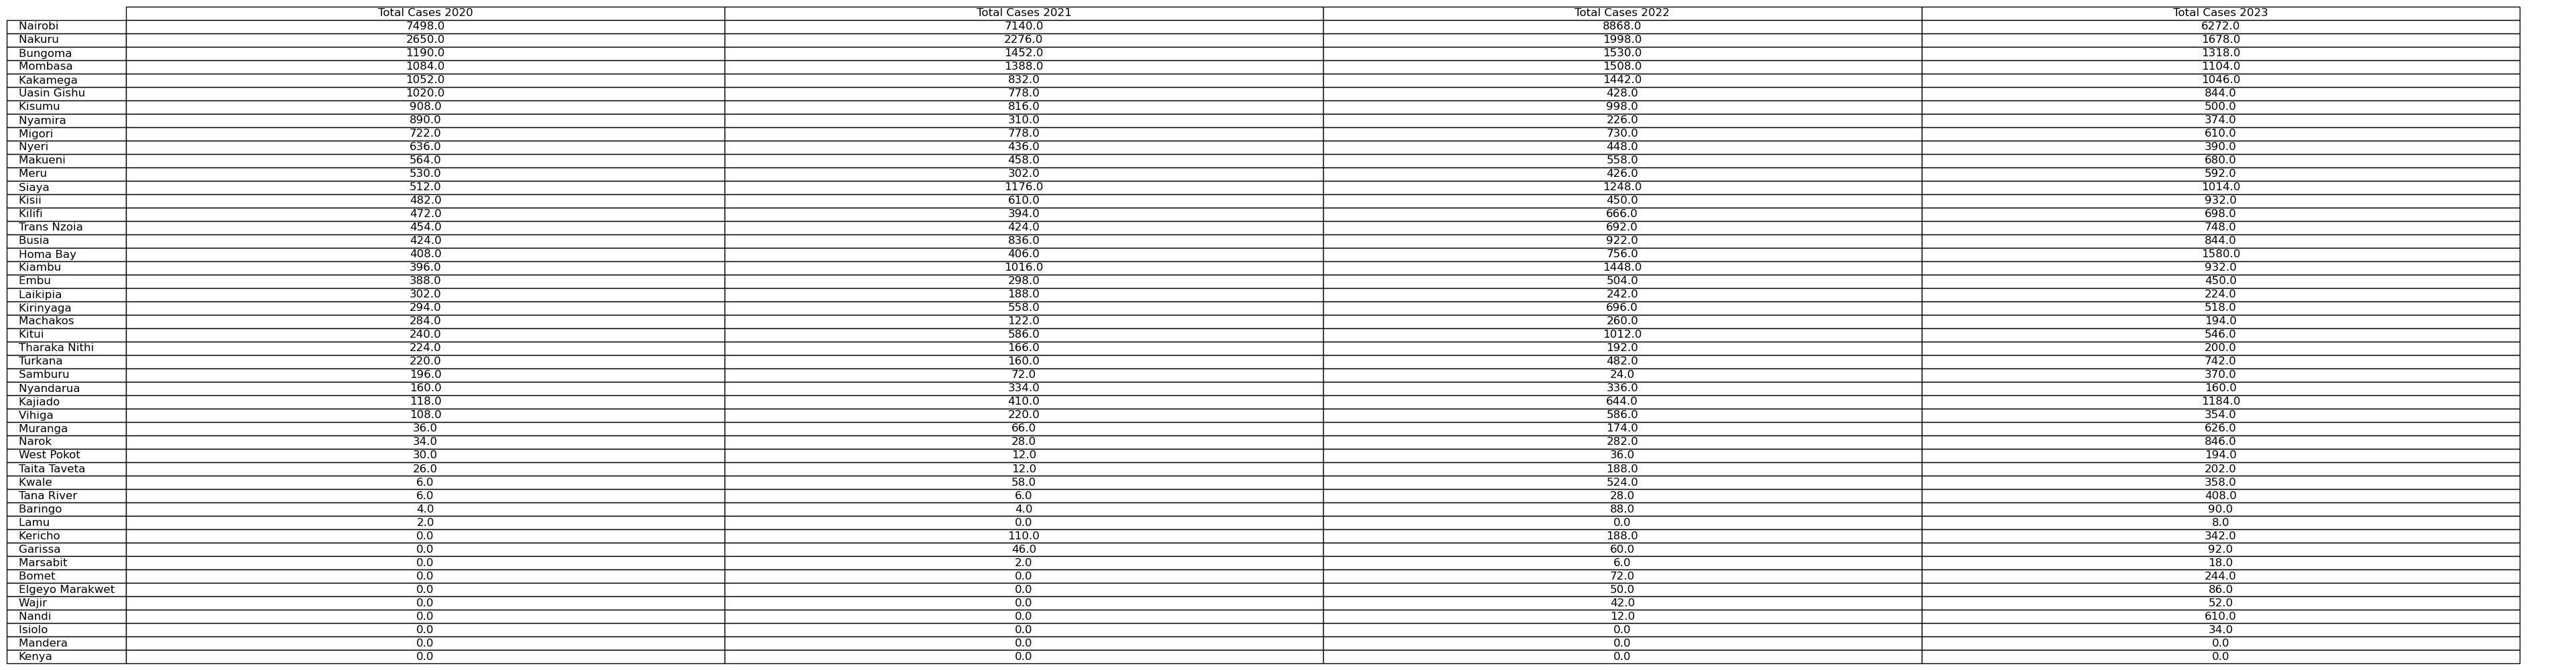

In [257]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(48, 5))  # Adjust the size as needed
ax.xaxis.set_visible(False)  # Hide the x-axis
ax.yaxis.set_visible(False)  # Hide the y-axis
ax.set_frame_on(False)  # Hide the frame

# Add the table to the axis
tabla = table(ax, df_sorted, loc='center', cellLoc='center', colWidths=[0.2]*len(df_sorted.columns))

# Style the table
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)  # Adjust the scaling as needed

# Save the figure as a PDF
plt.savefig('dataframe_as_pdf.pdf', format='pdf', bbox_inches='tight')

# Optionally show the plot (not necessary for saving)
plt.show()

In [258]:
# Get the last 20 rows from df_sorted
df_tail = df_sorted.tail(20)

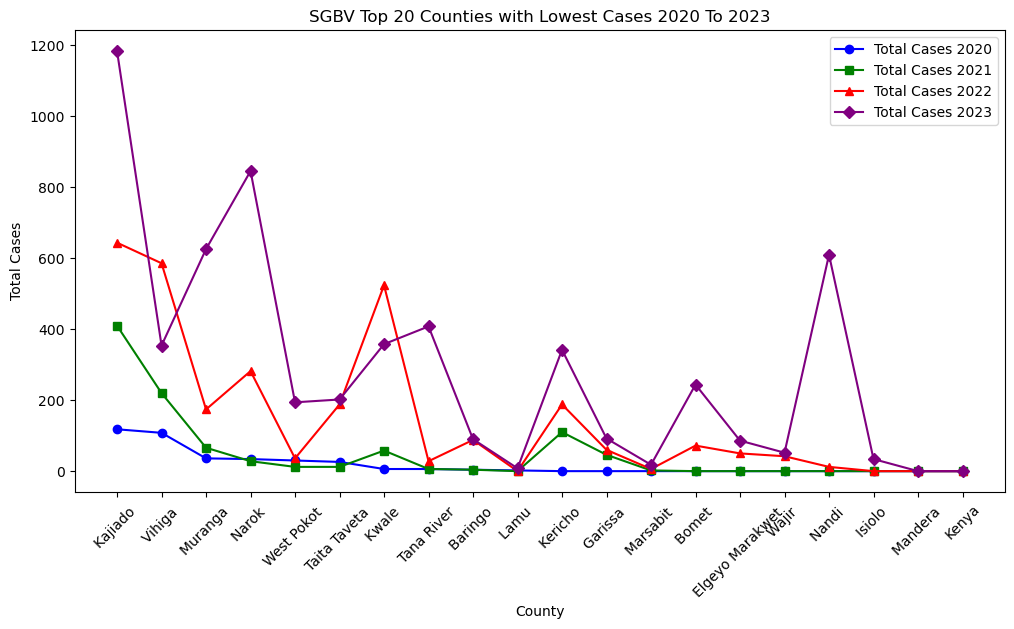

In [259]:
# Plotting the line graphs for multiple columns
plt.figure(figsize=(12, 6))

# Plot each column with a different color
plt.plot(df_tail.index, df_tail['Total Cases 2020'], marker='o', linestyle='-', color='b', label='Total Cases 2020')
plt.plot(df_tail.index, df_tail['Total Cases 2021'], marker='s', linestyle='-', color='g', label='Total Cases 2021')
plt.plot(df_tail.index, df_tail['Total Cases 2022'], marker='^', linestyle='-', color='r', label='Total Cases 2022')
plt.plot(df_tail.index, df_tail['Total Cases 2023'], marker='D', linestyle='-', color='purple', label='Total Cases 2023')

# Add titles and labels
plt.title('SGBV Top 20 Counties with Lowest Cases 2020 To 2023')
plt.xlabel('County')
plt.ylabel('Total Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.tight_layout


plt.savefig('SGBV Top 20 Counties with Lowest Cases 2020 To 2023.pdf', format='pdf')
plt.show()

In [260]:
# Get the last 20 rows from df_sorted
df_head = df_sorted.head(27)

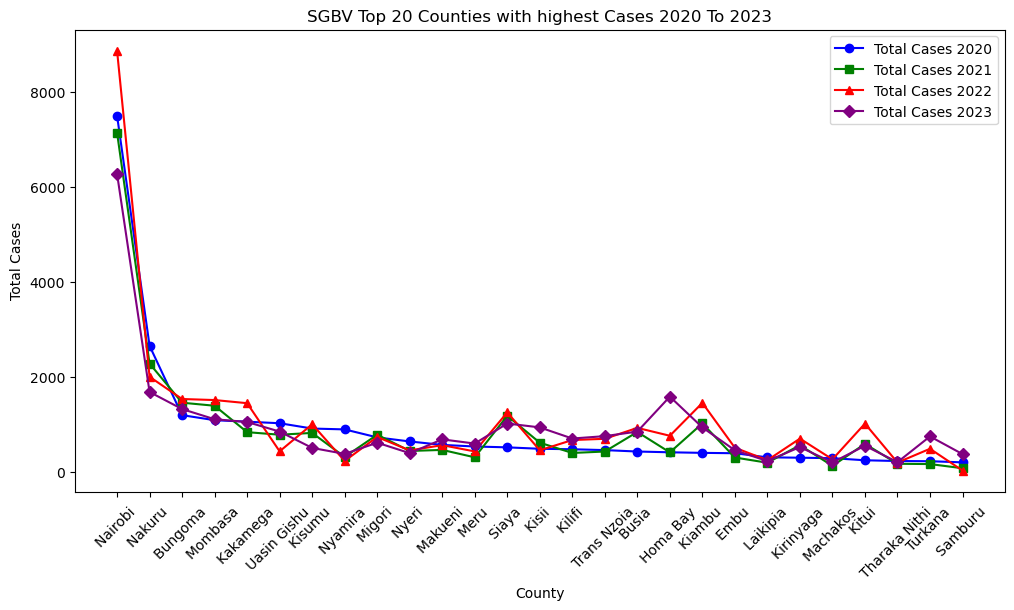

In [261]:
# Plotting the line graphs for multiple columns
plt.figure(figsize=(12, 6))

# Plot each column with a different color
plt.plot(df_head.index, df_head['Total Cases 2020'], marker='o', linestyle='-', color='b', label='Total Cases 2020')
plt.plot(df_head.index, df_head['Total Cases 2021'], marker='s', linestyle='-', color='g', label='Total Cases 2021')
plt.plot(df_head.index, df_head['Total Cases 2022'], marker='^', linestyle='-', color='r', label='Total Cases 2022')
plt.plot(df_head.index, df_head['Total Cases 2023'], marker='D', linestyle='-', color='purple', label='Total Cases 2023')

# Add titles and labels
plt.title('SGBV Top 20 Counties with highest Cases 2020 To 2023')
plt.xlabel('County')
plt.ylabel('Total Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.tight_layout


plt.savefig('SGBV Top 20 Counties with highest Cases 2020 To 2023.pdf', format='pdf')
plt.show()

### __Using plotly express to create a horizontal bar chart for variance__. 

In [262]:
# Calculate variance
var = df_sorted.var()


In [263]:
print("var:", type(var))
print("var:", var.shape)
var


var: <class 'pandas.core.series.Series'>
var: (4,)


Total Cases 2020    1.290011e+06
Total Cases 2021    1.174879e+06
Total Cases 2022    1.703534e+06
Total Cases 2023    8.603766e+05
dtype: float64

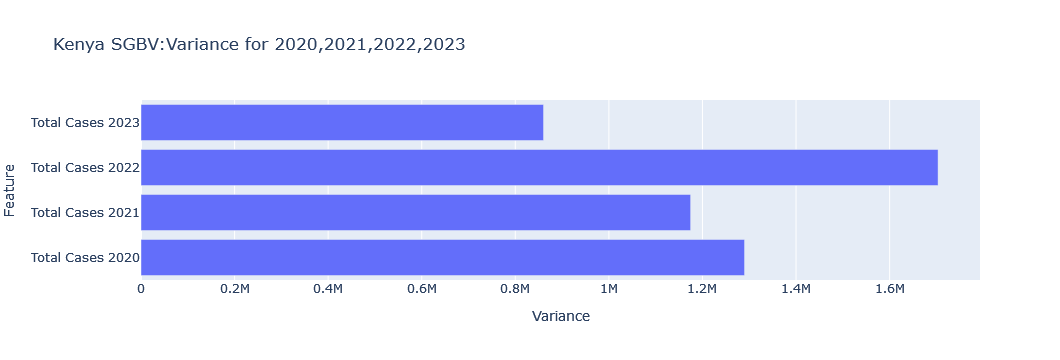

In [264]:
# Create horizontal bar chart for var
fig = px.bar(
    x=var,
    y=var.index,
    title = "Kenya SGBV:Variance for 2020,2021,2022,2023 "
    
)
fig.update_layout(xaxis_title= "Variance", yaxis_title= "Feature")

fig.show()


In [265]:
# Calculate trimmed variance
trim_var = df_sorted.apply(trimmed_var, limits=(0.1, 0.1)).sort_values()


In [266]:
trim_var

Total Cases 2020     92106.5100
Total Cases 2023    100801.3775
Total Cases 2021    102515.4375
Total Cases 2022    149859.4775
dtype: float64

### __Using  plotly express to create a horizontal bar chart of trim_var__. 

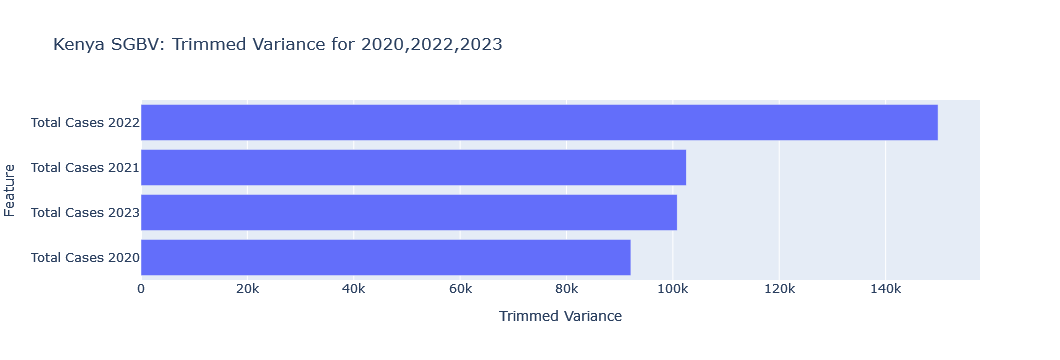

<Figure size 640x480 with 0 Axes>

In [267]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
    x=trim_var,
    y=trim_var.index,
    title = "Kenya SGBV: Trimmed Variance for 2020,2022,2023"
)
fig.update_layout(xaxis_title= "Trimmed Variance", yaxis_title= "Feature")

plt.savefig('Kenya SGBV:Trimmed Variance for 2020,2022,2023.pdf', format='pdf')
fig.show()


### __Generate a list high_var_cols with the column__ 


In [268]:
high_var_cols = trim_var.tail(5).index.to_list()

In [269]:
print("high_var_cols type:", type(high_var_cols))

high_var_cols type: <class 'list'>


In [270]:
print("high_var_cols len:", len(trim_var))



high_var_cols len: 4


In [271]:
high_var_cols


['Total Cases 2020',
 'Total Cases 2023',
 'Total Cases 2021',
 'Total Cases 2022']

### __Creating the feature matrix X__. 

In [286]:
X = df[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

KeyError: "None of [Index(['Total Cases 2020', 'Total Cases 2023', 'Total Cases 2021',\n       'Total Cases 2022'],\n      dtype='object')] are in the [columns]"

### __Build Model__


### __Iterate__


### __Creating a DataFrame X_summary with the mean and standard deviation for all the features in X__.

In [273]:
X_summary = X.aggregate(["mean","std"]).astype(int)

print("X_summary type:", type(X_summary))
print("X_summary shape:", X_summary.shape)
X_summary


X_summary type: <class 'pandas.core.frame.DataFrame'>
X_summary shape: (2, 4)


,Total Cases 2020,Total Cases 2023,Total Cases 2021,Total Cases 2022
mean,511,652,526,668
std,1135,927,1083,1305


### __Create a StandardScaler transformer, use it to transform the data in X, and then put the transformed data into a DataFrame named X_scaled__.


In [274]:
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)


In [275]:
print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()


X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (48, 4)


,Total Cases 2020,Total Cases 2023,Total Cases 2021,Total Cases 2022
0,-0.451889,-0.612572,-0.487420,-0.449177
1,-0.455448,-0.444789,-0.491150,-0.461566
2,0.603372,0.725335,0.862610,0.667330
3,-0.078188,0.208912,0.288288,0.196570
4,-0.455448,-0.616930,-0.491150,-0.478600


### __Creating a DataFrame X_scaled_summary with the mean and standard deviation for all the features in X_scaled__.


In [276]:
X_scaled_summary = X_scaled.aggregate(["mean","std"]).astype(int)

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary


X_scaled_summary type: <class 'pandas.core.frame.DataFrame'>
X_scaled_summary shape: (2, 4)


,Total Cases 2020,Total Cases 2023,Total Cases 2021,Total Cases 2022
mean,0,0,0,0
std,1,1,1,1


In [277]:
n_clusters = (2, 6)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build our model
    model = make_pipeline(StandardScaler(), KMeans(n_clusters = k,random_state = 42,n_init=10))
    # Train our model
    model.fit(X)
    # Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    # calculate silhouette_scores
    silhouette_scores.append(
        silhouette_score(X,model.named_steps["kmeans"].labels_)
    )
    

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)




C:\Users\ADMIN\Anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ADMIN\Anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



inertia_errors type: <class 'list'>
inertia_errors len: 2
Inertia: [34.26115918191837, 4.981275450384558]

silhouette_scores type: <class 'list'>
silhouette_scores len: 2
Silhouette Scores: [0.9030222238293885, 0.4446748481389225]


### __Using plotly express to create a line plot that shows the values of inertia_errors as a function of n_clusters__.

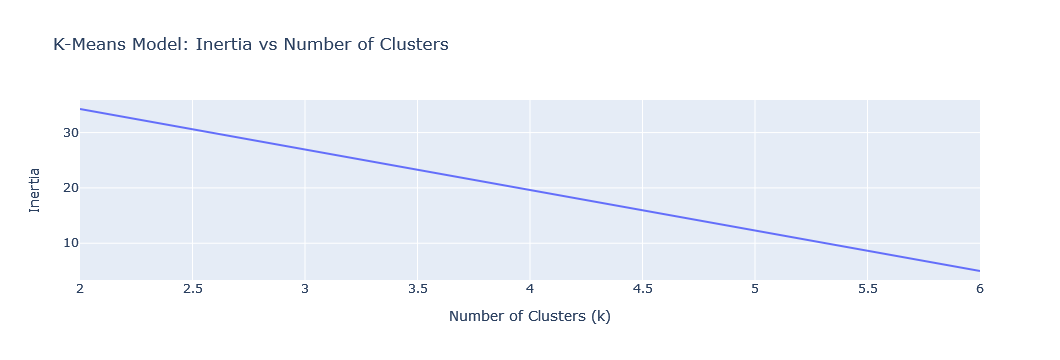

In [278]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters, y=inertia_errors, title="K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title="Number of Clusters (k)",yaxis_title = "Inertia")

fig.show()


### __Using plotly express to create a line plot that shows the values of silhouette_scores as a function of n_clusters__.

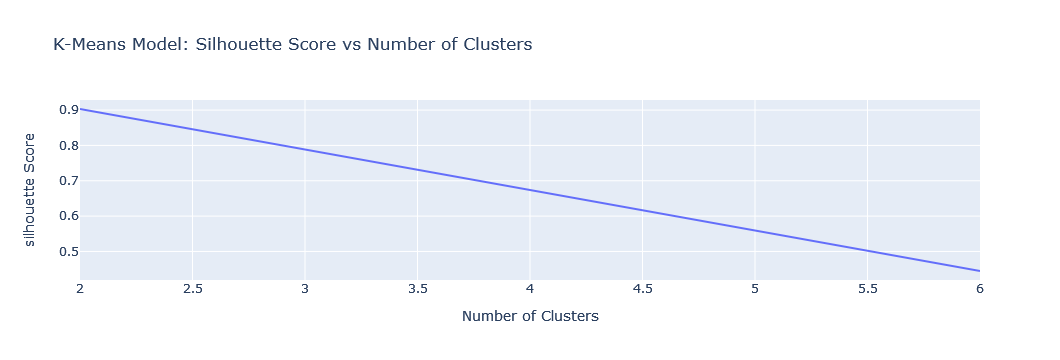

In [279]:

# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    title ="K-Means Model: Silhouette Score vs Number of Clusters"
    

)
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="silhouette Score")

fig.show()


### __Build and train a new k-means model named final_model__

In [280]:
# Build model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=1, random_state=42)
)


# Fit model to data
final_model.fit(X)



C:\Users\ADMIN\Anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ADMIN\Anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=1, random_state=42))])

### Extracting the labels for final_model created during training and assign them to the variable labels.


In [281]:
labels = final_model.named_steps["kmeans"].labels_

print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

labels type: <class 'numpy.ndarray'>
labels len: 48
[0 0 0 0 0]


### Create a DataFrame xgb

In [282]:
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb


xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (1, 4)


,Total Cases 2020,Total Cases 2023,Total Cases 2021,Total Cases 2022
0,511.875,652.25,526.791667,668.125


#### Use plotly express to create a side-by-side bar chart from xgb that shows the mean of the features in X for each of the clusters in your final_model. 

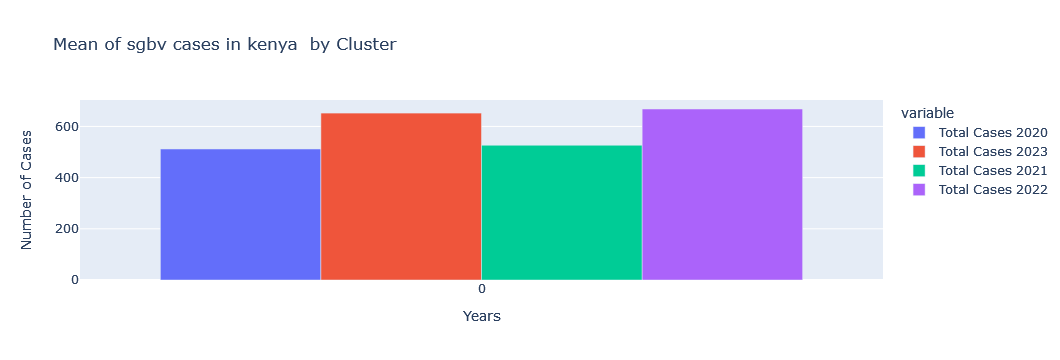

In [283]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode = "group",
    title= "Mean of sgbv cases in kenya  by Cluster"

)
fig.update_layout(xaxis_title="Years", yaxis_title = "Number of Cases")
fig.show()




### __Creating a PCA transformer, use it to reduce the dimensionality of the data in X to 2, and then put the transformed data into a DataFrame named X_pca__.

In [284]:
# Instantiate transformer
pca = PCA(n_components=2,random_state =42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1", "PC2"])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (48, 2)


,PC1,PC2
0,-1079.289150,-94.113873
1,-1029.889085,8.501792
2,1568.106484,50.579001
3,332.798321,198.228521
4,-1107.121367,-103.287577


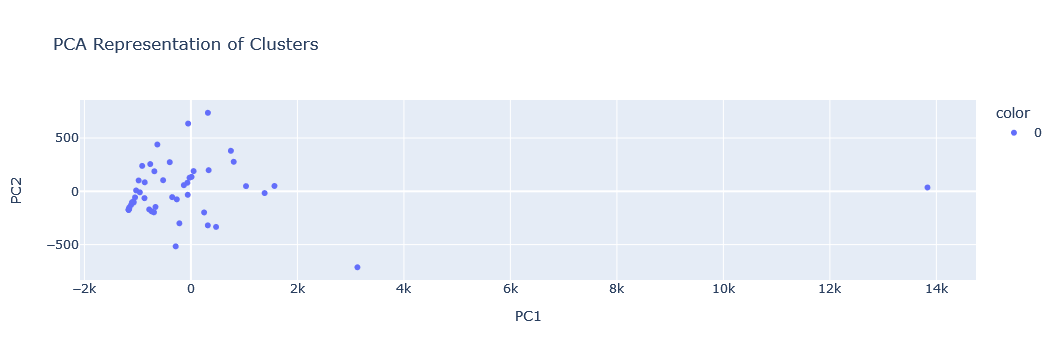

In [285]:
fig =px.scatter(
    data_frame = X_pca,
    x="PC1",
    y="PC2",
    color = labels.astype(str),
    title="PCA Representation of Clusters"
)

fig.update_layout(xaxis_title="PC1", yaxis_title = "PC2")

fig.show()